# Regression Models

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [60]:
x = np.array([5,15,25,35,45,55]).reshape(-1,1)
y = np.array([5,20,14,32,22,38])

In [9]:
model = LinearRegression()

In [10]:
model.fit(x,y)

LinearRegression()

In [13]:
r_sq = model.score(x,y)
print("the R-Squared Value is: ", r_sq)

the R-Squared Value is:  0.7158756137479542


In [15]:
print("Model Intercept: ", model.intercept_)
print("Model Coef: ", model.coef_)

Model Intercept:  5.633333333333329
Model Coef:  [0.54]


In [55]:
def f(x):
    return 5.633333333333329 + 0.54*x

In [56]:
f(x)

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

In [64]:
y_pred = model.predict(x)
print(y_pred)


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

In [19]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Text(0, 0.5, 'y')

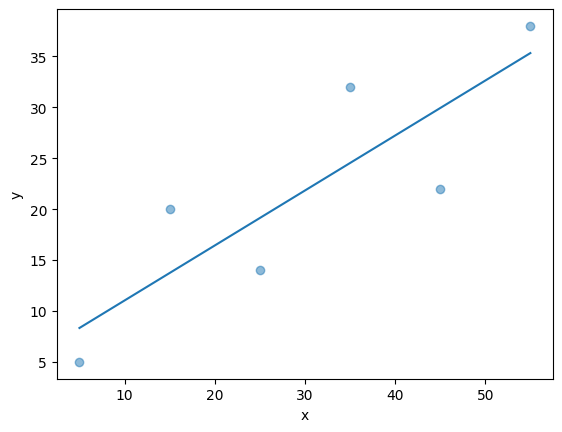

In [62]:
plt.scatter(x,y,alpha=.5)
plt.plot(x, y_pred)

plt.xlabel('x')
plt.ylabel('y')

## Multiple Linear Regression

In [43]:
X = ([0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35])
Y = ([4,5,20,14,32,22,38, 43])
X, Y = np.array(X), np.array(Y)
print(X)
print(Y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [44]:
model = LinearRegression().fit(X, Y)

In [45]:
r_sq = model.score(X,Y)
print('Coeficient of Determination: ', r_sq)
print('Intercept: ', model.intercept_)
print('slope: ', model.coef_)

Coeficient of Determination:  0.8615939258756775
Intercept:  5.52257927519819
slope:  [0.44706965 0.25502548]


In [48]:
Y_pred = model.predict(X)
print('Pred Response: ', Y_pred, sep='\n')

Pred Response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [49]:
Y_pred = model.intercept_ + np.sum(model.coef_ * X, axis=1)
Y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [51]:
X_new = np.arange(10).reshape((-1,2))
print(X_new)
Y_new = model.predict(X_new)
print(Y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [97]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([15,11,2,8,25,32])
print(x)
print(y)


[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


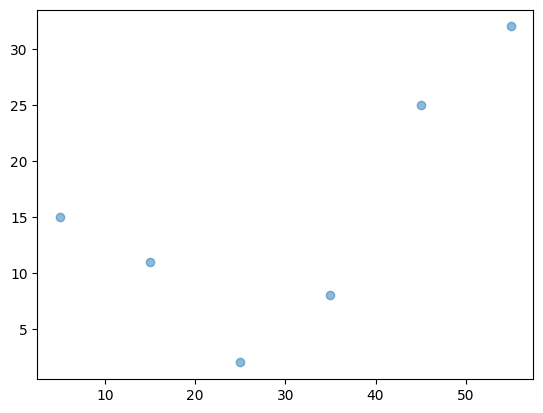

In [99]:
plt.scatter(x,y, alpha=0.5)

In [100]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [101]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [102]:
x_ = transformer.transform(x)

In [103]:
x_ = PolynomialFeatures(degree=2, include_bias=False). fit_transform(x)

In [104]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [106]:
model = LinearRegression().fit(x_, y)

In [107]:
r_sq = model.score(x_,y)
print('Coefficient of determination:' , r_sq)
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Coefficient of determination: 0.8908516262498563
Intercept:  21.37232142857144
Coefficients:  [-1.32357143  0.02839286]


In [111]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [112]:
model = LinearRegression(fit_intercept=False).fit(x_,y)

In [113]:
r_sq = model.score(x_, y)
print('Coefficient of determination:' , r_sq)
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Coefficient of determination: 0.8908516262498564
Intercept:  0.0
Coefficients:  [21.37232143 -1.32357143  0.02839286]


In [115]:
y_pred = model.predict(x_)
print('Predicted response: ', y_pred)

Predicted response:  [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


## Advanced Linear Regression

In [116]:
import statsmodels.api as sm

In [127]:
X1 = ([0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35])
Y1 = ([4,5,20,14,32,22,38, 43])
X1, Y1 = np.array(X), np.array(Y)
print(X1)
print(Y1)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [128]:
X1 = sm.add_constant(X1)

In [129]:
X1

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [130]:
model = sm.OLS(Y1, X1)

In [131]:
result = model.fit()

In [132]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sat, 01 Apr 2023   Prob (F-statistic):            0.00713
Time:                        14:01:55   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/apple/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [133]:
print('Coefficient of determination: ', result.rsquared)
print('Adjusted coeff of determination: ', result.rsquared_adj)
print('Regression coeff: ', result.params)

Coefficient of determination:  0.8615939258756776
Adjusted coeff of determination:  0.8062314962259487
Regression coeff:  [5.52257928 0.44706965 0.25502548]


In [134]:
print('predicted response: ', result.fittedvalues, sep='\n')
print('predicted response: ', result.predict(X1))

predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:  [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
